In [24]:
import sys
import json
from collections import defaultdict

stat = defaultdict(lambda :defaultdict(int))
cnt = 0
with open('alldata.json', 'r') as f:
    jsonstr = f.read()
    data = json.loads(jsonstr)
    for d in data:
        d = json.loads(d)
        for k in d:
            if k != 'title':
                stat[k][d[k]] += 1
    for k in stat:
        print('[主题：', k, '] 包含的类别及该类别下的issues数量：', stat[k])

[主题： type ] 包含的类别及该类别下的issues数量： defaultdict(<class 'int'>, {'bug': 5796, 'build/install': 3195, 'performance': 476, 'support': 4573, 'feature': 2306, 'others': 544, 'docs-bug': 1344, 'docs-feature': 63, 'bug/performance': 4})
[主题： other ] 包含的类别及该类别下的issues数量： defaultdict(<class 'int'>, {'TF 2.4': 257, 'TFLiteConverter': 260, 'TF 2.2': 799, 'java': 3, 'TF 2.0': 2382, 'TF 2.3': 898, 'TF 2.5': 46, 'TF 1.15': 442, 'TF 2.1': 1137, 'regression issue': 94, 'stalled': 1334, 'TFLiteGpuDelegate': 1, 'TF 1.12': 166, 'TF 1.14': 706, 'WIP': 24, 'awaiting review': 12, 'API review': 12, 'TF 1.13': 470, 'contrib': 141, 'good first issue': 30, 'TFLiteNNAPIDelegate': 1, 'invalid': 8, 'Fixed in Nightly': 2, 'pending merge internally': 3, 'release': 1, 'awaiting testing (then merge)': 1, 'ready to pull': 1})
[主题： stat ] 包含的类别及该类别下的issues数量： defaultdict(<class 'int'>, {'awaiting response': 6754, 'awaiting tensorflower': 3864, 'contributions welcome': 1329, 'community support': 370, 'cross-posted from Kera

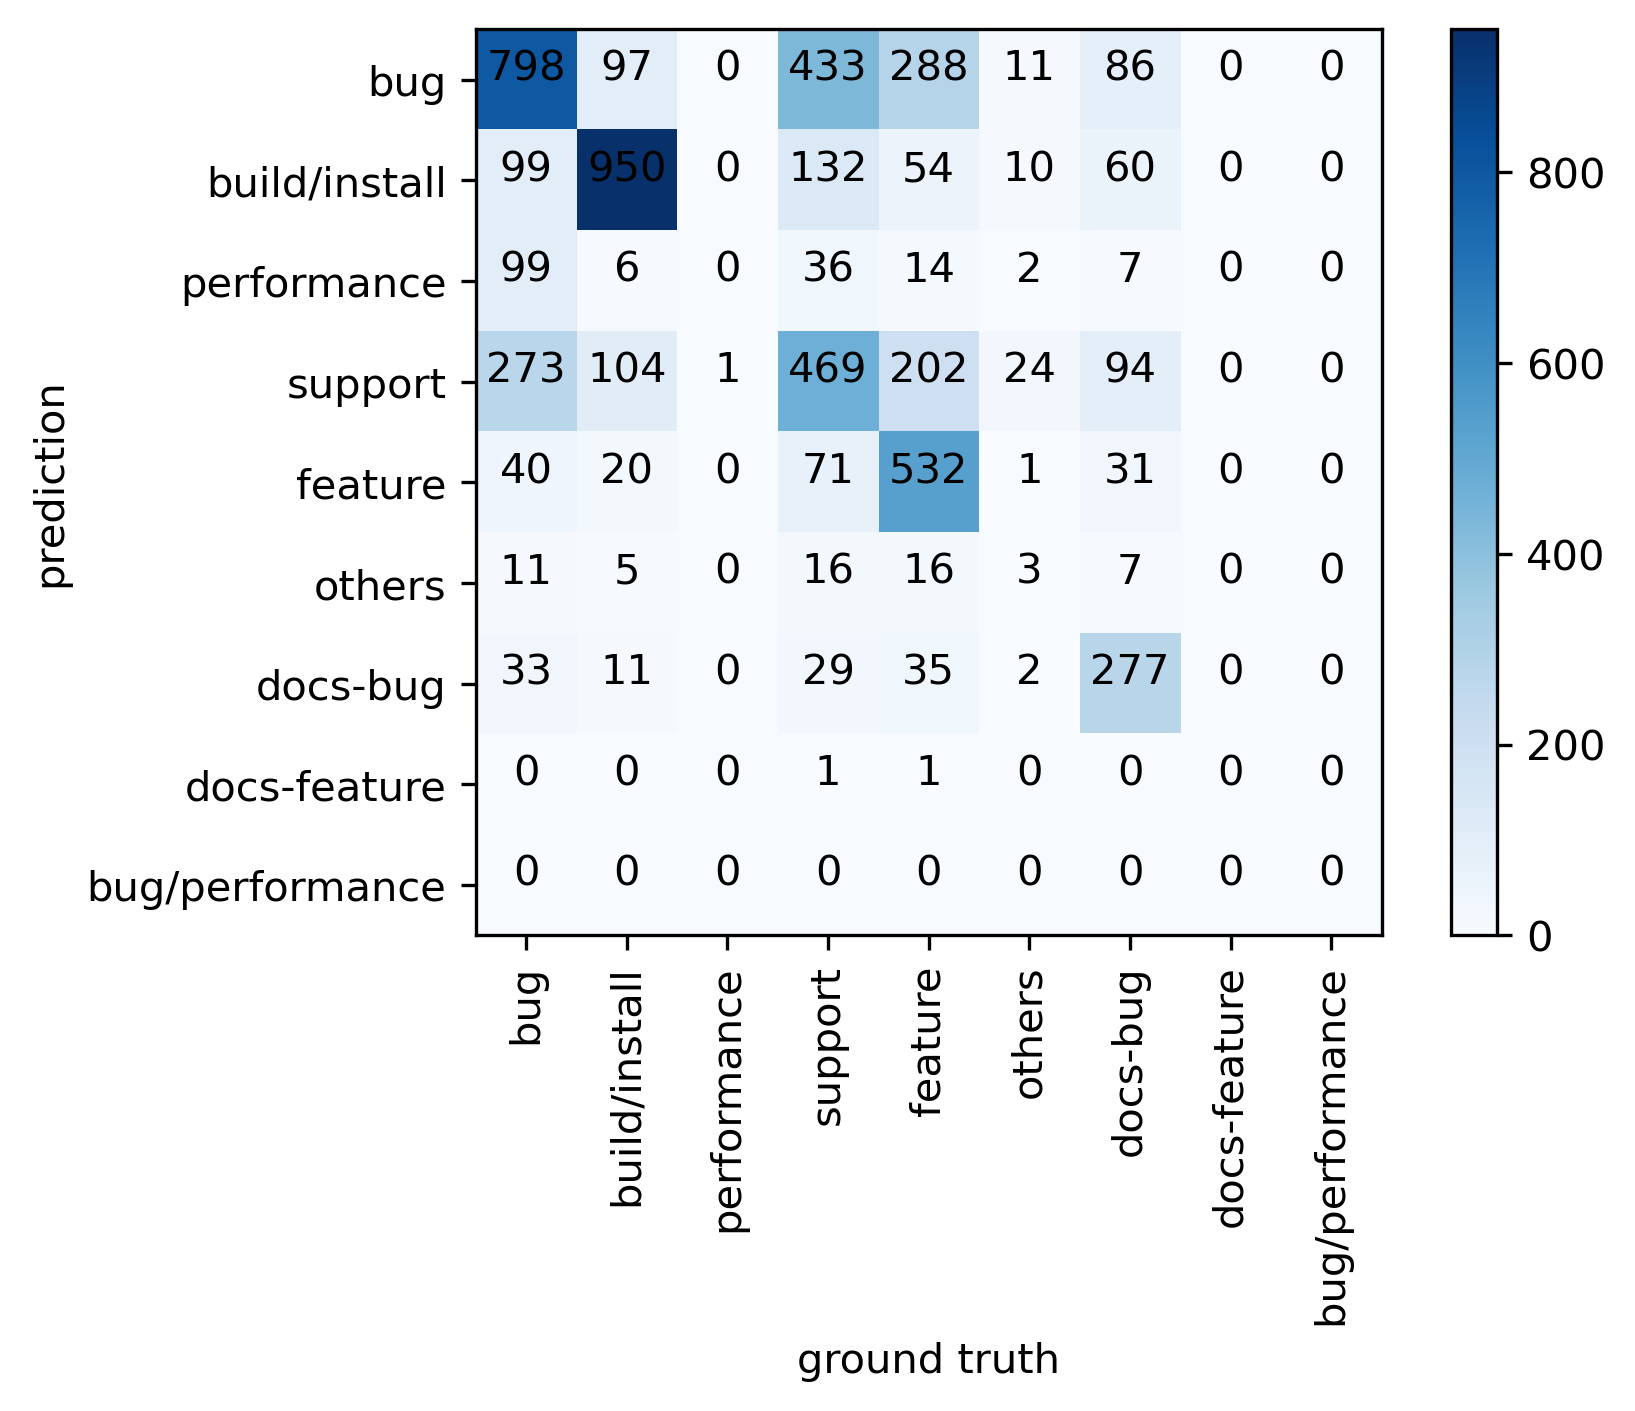

domain: type
types incude: ['bug', 'build/install', 'performance', 'support', 'feature', 'others', 'docs-bug', 'docs-feature', 'bug/performance']
train size=12810, test_size=5491
accuracy = 0.5516299399016572
train time = 0.3830s test time = 0.2463s


In [39]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import time

DOMAIN = 'type'  # 主题
TRAIN_SPLIT = 0.7  # 训练集大小

# 训练阶段

t_train = time.time()

with open('alldata.json', 'r') as f:
    jsonstr = f.read()
    
olddata = json.loads(jsonstr)
data = []
for d in olddata:
    d = json.loads(d)
    if DOMAIN in d:
        data.append(json.dumps(d))
train_size = int(TRAIN_SPLIT * len(data)) 
train_data = data[:train_size]
test_data = data[train_size:]

stat = defaultdict(lambda : defaultdict(lambda :1e-1))
stat_type = defaultdict(float)
all_words = set()

for d in train_data:
    d = json.loads(d)
    for w in d['title'].split():
        stat[d[DOMAIN]][w] += 1
        all_words.add(w)
    stat_type[d[DOMAIN]] += 1
        
all_types = list(stat.keys())

for tp in all_types:
    stat_sum = sum([stat[tp][w] for w in all_words])
    for w in stat[tp]:
        stat[tp][w] /= stat_sum
        
all = sum(stat_type.values())
for tp in all_types:
    stat_type[tp] /= all
t_train = time.time() - t_train

# 测试阶段

t_test = time.time()
correct = 0
total = 0
confusion = defaultdict(lambda : defaultdict(int))
    
for d in test_data:
    d = json.loads(d)
    prob = {}
    for tp in stat:
        prob[tp] = stat_type[tp]
        for w in d['title'].split():
            prob[tp] *= stat[tp][w] if w in stat[tp] else 1e-10
    pred = max(prob, key=prob.get)
    if pred == d[DOMAIN]:
        correct += 1
    confusion[d[DOMAIN]][pred] += 1
    total += 1
t_test = time.time() - t_test
    
plt.rcParams['figure.dpi'] = 300
indices = range(len(all_types))
plt.xticks(indices, all_types, rotation=90)
plt.yticks(indices, all_types)
confusion_mat = []
for i, x in enumerate(all_types):
    col = []
    for j, y in enumerate(all_types):
        plt.text(i, j, confusion[x][y], ha='center')
        col.append(confusion[y][x])
    confusion_mat.append(col)
plt.imshow(confusion_mat, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('ground truth')
plt.ylabel('prediction')
plt.show()
       
print('domain:', DOMAIN)
print('types incude:',list(stat_type.keys()))
print('train size={}, test_size={}'.format(train_size, len(data) - train_size))
print('accuracy = {}'.format(correct / total))
print('train time = {:.4f}s test time = {:.4f}s'.format(t_train, t_test))


In [3]:
print(stat['performance']['wasm'])

1.5793796196849878e-05
